In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
import numpy as np
import random
import os

import warnings
warnings.filterwarnings("ignore")

## Load and explore the data

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

In [15]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [16]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

In [17]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


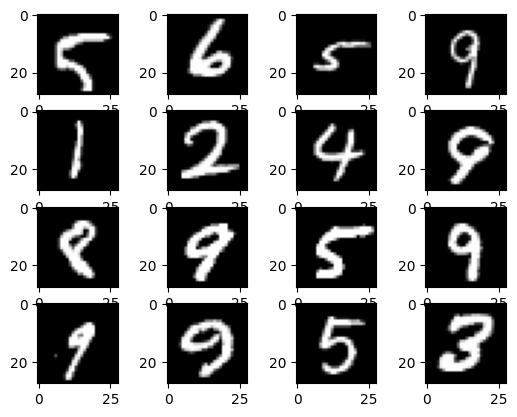

In [18]:
fig, axes = plt.subplots(4, 4)
for i in range(4):
  for j in range(4):
    ind = random.randint(0, 60000)
    axes[i][j].imshow(X_train[ind], cmap='gray')
plt.show()

## Creating and training model

In [9]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', strides=1, activation='relu', input_shape=(img_rows, img_cols, 1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='valid', strides=1, activation='relu'),

    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', strides=1, activation='relu'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='valid', strides=1, activation='relu'),

    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])

In [19]:
MNIST_loss = tf.keras.losses.sparse_categorical_crossentropy
MNIST_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

In [20]:
# Compile the model
model.compile(loss=MNIST_loss, optimizer=MNIST_optimizer, metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                        

In [22]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 6s 11ms/step - loss: 0.0271 - accuracy: 0.9922 - val_loss: 0.0367 - val_accuracy: 0.9919
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0255 - accuracy: 0.9921 - val_loss: 0.0277 - val_accuracy: 0.9935
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0250 - accuracy: 0.9929 - val_loss: 0.0238 - val_accuracy: 0.9942
Epoch 4/10
375/375 [==============================] - 6s 15ms/step - loss: 0.0217 - accuracy: 0.9938 - val_loss: 0.0287 - val_accuracy: 0.9930
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0196 - accuracy: 0.9942 - val_loss: 0.0239 - val_accuracy: 0.9945
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0195 - accuracy: 0.9941 - val_loss: 0.0247 - val_accuracy: 0.9928
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0193 - accuracy: 0.9939 - val_loss: 0.0270 - val_accuracy: 0.9937

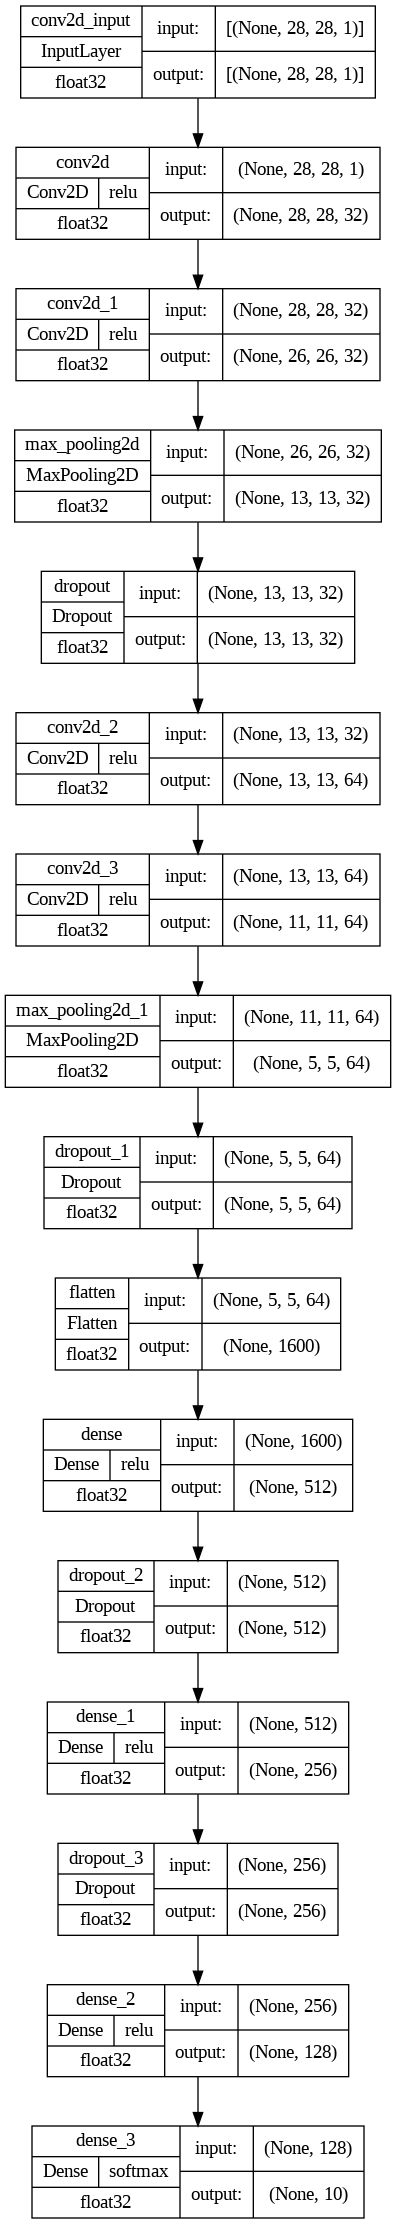

In [14]:
model_img_file = '/content/MNIST.png'
tf.keras.utils.plot_model(model, to_file=model_img_file,
                          show_shapes=True,
                          show_layer_activations=True,
                          show_dtype=True,
                          show_layer_names=True )

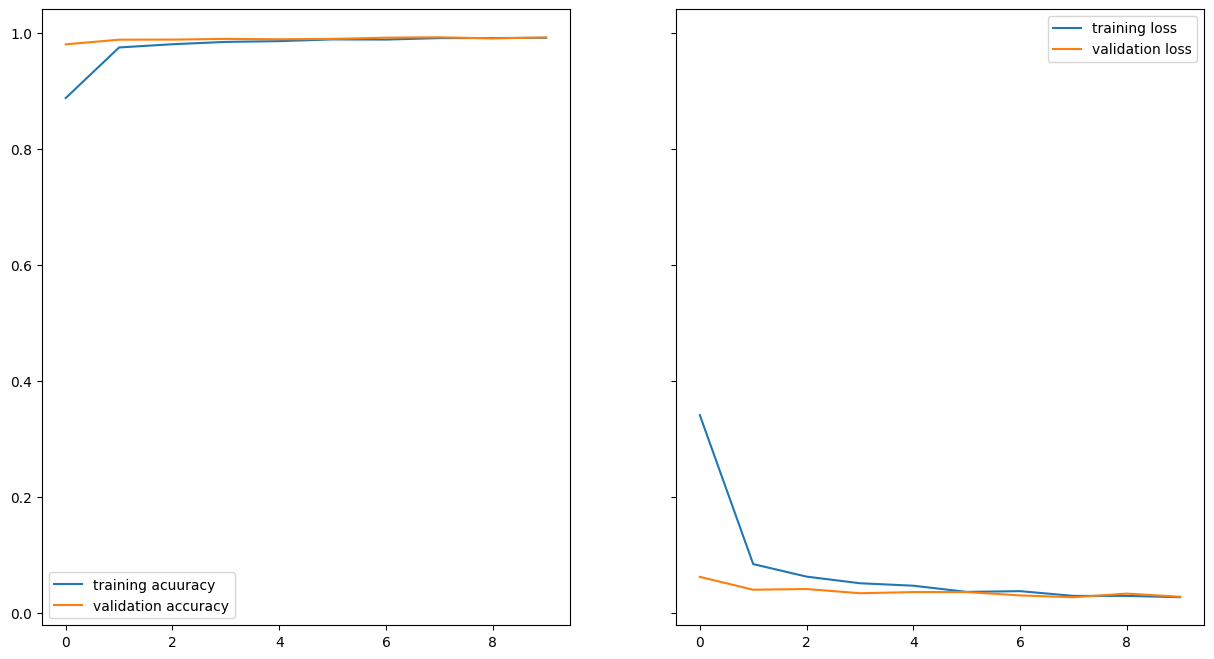

In [ ]:
fig, axis = plt.subplots(1,2, sharey='row', figsize=(15,8))
axis[0].plot(history.history["accuracy"], label="training acuuracy")
axis[0].plot(history.history["val_accuracy"], label="validation accuracy")
axis[0].legend()
axis[1].plot(history.history["loss"], label="training loss")
axis[1].plot(history.history["val_loss"], label="validation loss")
axis[1].legend()
plt.show()

# Test model

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0230 - accuracy: 0.9931


[0.023027054965496063, 0.9930999875068665]

In [ ]:
pred_prob = model.predict(X_test)
y_pred = np.argmax(pred_prob, axis=1)

313/313 [==============================] - 1s 2ms/step


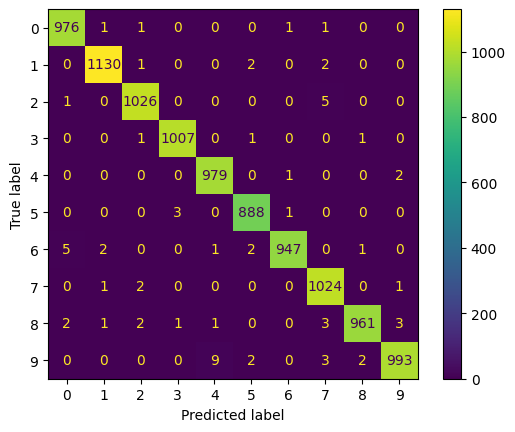


              precision    recall  f1-score   support

           0      0.992     0.996     0.994       980
           1      0.996     0.996     0.996      1135
           2      0.993     0.994     0.994      1032
           3      0.996     0.997     0.997      1010
           4      0.989     0.997     0.993       982
           5      0.992     0.996     0.994       892
           6      0.997     0.989     0.993       958
           7      0.987     0.996     0.991      1028
           8      0.996     0.987     0.991       974
           9      0.994     0.984     0.989      1009

    accuracy                          0.993     10000
   macro avg      0.993     0.993     0.993     10000
weighted avg      0.993     0.993     0.993     10000



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
cm_display.plot()
plt.show()

print()
print(classification_report(y_test, y_pred, digits=3))

# Visualizing Intermediate Representations

1/1 [==============================] - 0s 260ms/step


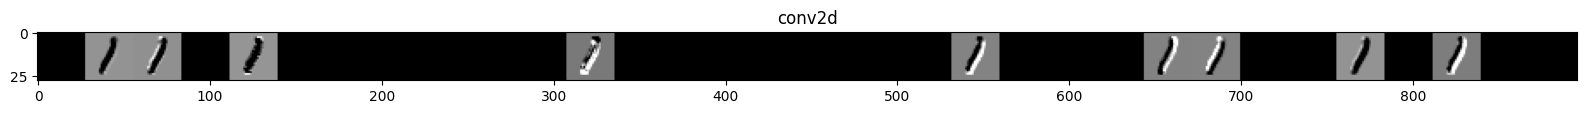

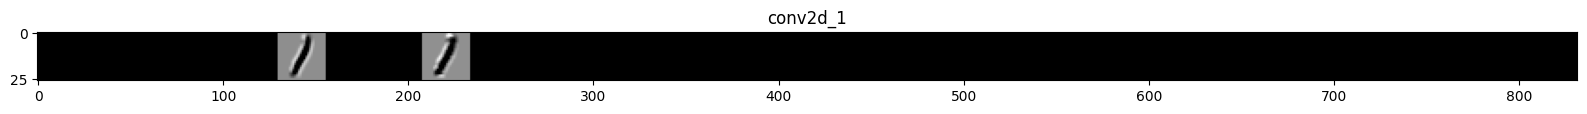

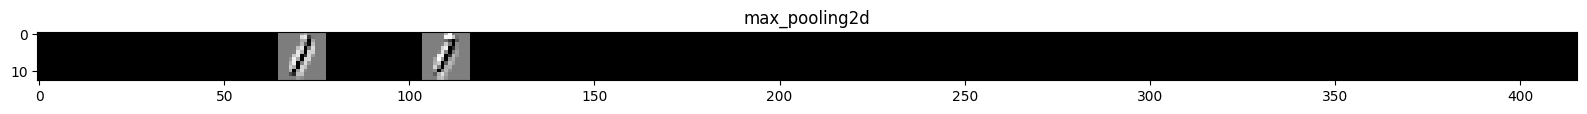

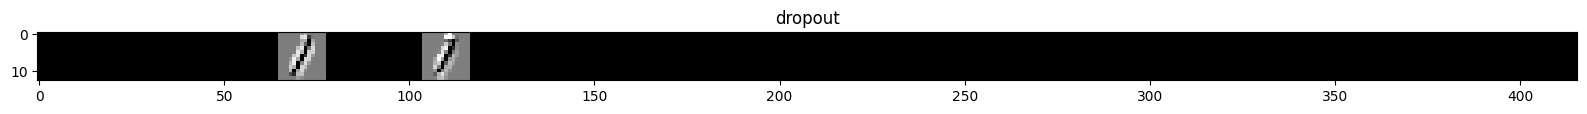

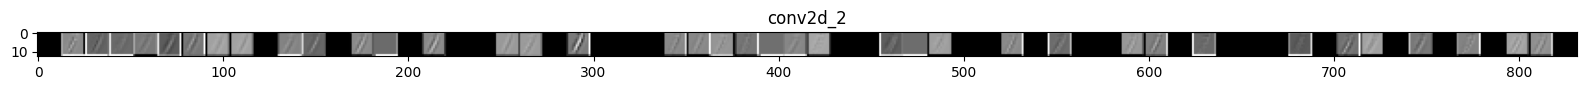

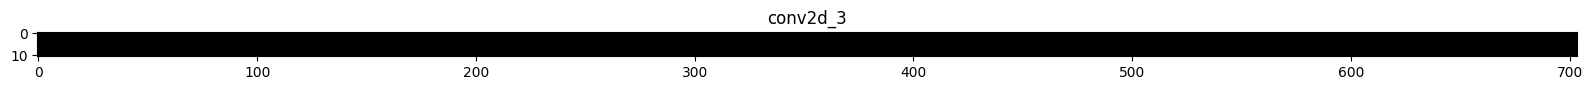

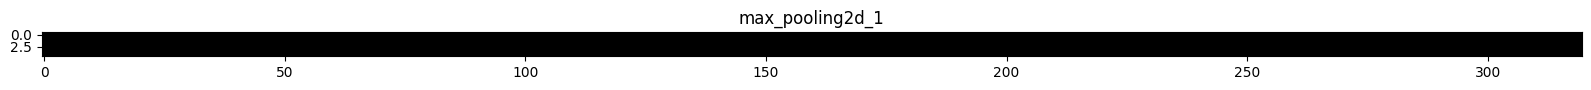

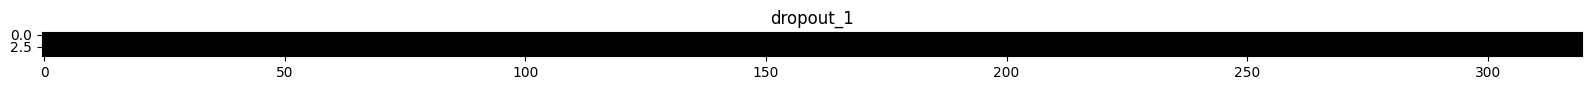

In [ ]:
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

x   = X_test[random.randint(0, 10000)]
x   = x.reshape((1,) + x.shape)

x /= 255.0

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):

  if len(feature_map.shape) == 4:

    n_features = feature_map.shape[-1]
    size       = feature_map.shape[ 1]

    display_grid = np.zeros((size, size * n_features))

    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid,  cmap='gray' )

In [ ]:
from google.colab import files
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import io  # Add this import

uploaded = files.upload()

image_filename = list(uploaded.keys())[0]
image_data = uploaded[image_filename]

image = Image.open(io.BytesIO(image_data))
image = image.convert('L')  # Convert to grayscale
image = image.resize((28, 28))  # Resize to 28x28 pixels
image = np.array(image)
image = image.reshape(1, 28, 28, 1).astype('float32') / 255.0  # Normalize and reshape

#  predictions with  model
predictions = model.predict(image)

# Map predictions to labels
class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Get the predicted class
predicted_class_index = np.argmax(predictions)

# class label for the predicted class
predicted_class_label = class_labels[predicted_class_index]

# Display
plt.imshow(image[0, :, :, 0], cmap='gray')
plt.title(f"Predicted Class: {predicted_class_label}")
plt.show()

Saving 77.png to 77.png


NameError: ignored